In [1]:
# project: p6
# submitter: jstump
# partner: none
# hours: 7

In [2]:
import geopandas as gpd
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.mask import mask

In [3]:
counties = gpd.read_file("counties.geojson")


In [4]:
#Q1: How many counties are in Wisconsin?

len(counties['NAME'].unique())

72

<AxesSubplot:>

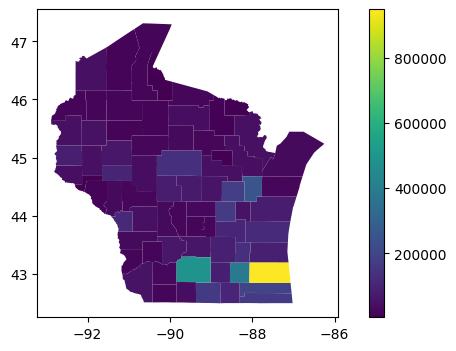

In [5]:
#Q2: What is the population of each county in WI?

counties.plot(figsize=(8,4), column="POP100", legend=True, cmap="viridis")

In [6]:
con = sqlite3.connect("counties_tracts.db")
area = pd.read_sql("""
select * from counties
""", con)
counties = counties.merge(area, left_on = "NAME", right_on = "NAME")


train, test = train_test_split(counties, random_state=250, test_size=0.25)



In [7]:
#Q3: What are the counties in the test dataset?

list(test["NAME"])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [8]:
#Q4: How much variance in the POP100 can a LinearRegression model explain based only on AREALAND?

model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
model.score(test[["AREALAND"]], test["POP100"])

0.016720430179409274

In [9]:
#Q5: What is the predicted population of a county with 400 square miles of area, according to the model?
df_predictions = pd.DataFrame({"AREALAND":[400*2.59e6]})
df_predictions['prediction'] = model.predict(df_predictions)
df_predictions['prediction'][0]


90000.07422783462

In [10]:
HU100 = pd.read_sql("""
select HU100, county from tracts
""", con)
HU100 = HU100.groupby('COUNTY').sum()
counties = counties.merge(HU100, left_on = "COUNTY", right_on = "COUNTY")
train, test = train_test_split(counties, random_state=250, test_size=0.25)

In [11]:
#Q6: What are the counties in the test dataset?

list(test["NAME"])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [12]:
#Q7: What are the HU100 values for the counties in the test dataset?

hu100_dict = {}
for i in range(len(test)):
    hu100_dict[test.iloc[i,0]] = test.iloc[i, -1]
hu100_dict

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [13]:
#Q8: How much variance in the POP100 can a LinearRegression model explain based only on HU100?

model2 = LinearRegression()
model2.fit(train[["HU100"]], train["POP100"])
scores = cross_val_score(model2, train[["HU100"]], train["POP100"] )
scores.mean()

0.9739348181232653

In [14]:
#Q9: What is the standard deviation of the cross validation scores from Q8?

scores.std()

0.01693954236334351

In [15]:
#Q10: What is the formula relating POP100 and HU100?

slope = round(float(model2.coef_), 2)
intercept = round(float(model2.intercept_), 2)
f"POP100 = {slope}*HU100 + {intercept}"


'POP100 = 2.47*HU100 + -9276.89'

Text(104371.0, 203007.0, 'Brown')

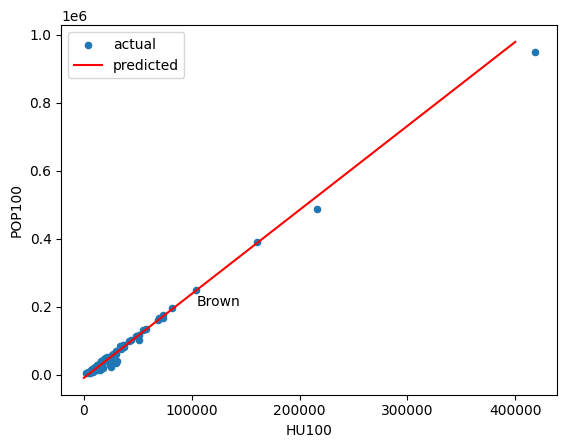

In [16]:
#Q11: What is the relationship between HU100 and POP100, visually?

df_predictions2 = pd.DataFrame({"HU100":range(1,400000)})
df_predictions2['prediction'] = model2.predict(df_predictions2)


ax = counties.plot.scatter(x = 'HU100', y = 'POP100', label = "actual")
ax = df_predictions2.plot.line(ax = ax, x = 'HU100', y = 'prediction', color = 'red', label = 'predicted')
ax.legend()
ax.text(float(counties[counties['NAME'] == "Brown County"]['HU100']), float(counties[counties['NAME'] == "Brown County"]['POP100']) - 45000, 'Brown')


In [17]:
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

In [18]:
#Q12: How many numbers in matrix A are between 3 and 6 (inclusive)?

len(A[np.where((A>=3) & (A<=6))])

8

In [19]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

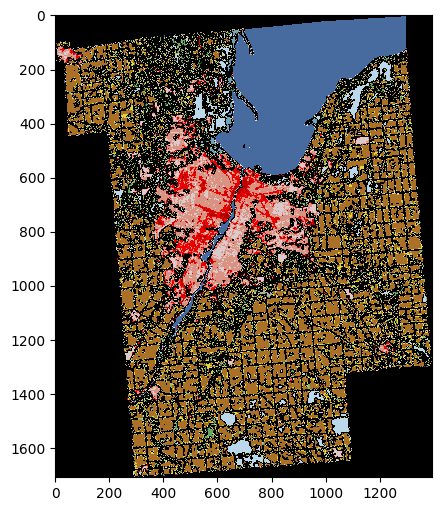

In [20]:
#Q13: How does Brown County look?

land = rasterio.open("zip://../p6/land.zip!wi.tif")
brown = counties.loc[counties['NAME']=="Brown County"]
matrix, _ = mask(land, brown.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
#plt.imshow(matrix)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, custom_cmap, vmin=0, vmax=255)



In [21]:
#Q14: What portion of Brown County is "Open Water"?

land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

matrixB = matrix.reshape(-1,1)
matrixB = np.delete(matrixB, np.where(matrixB == 0))
sum((matrixB==land_use['open_water']).astype(int))/len(matrixB)

0.13797526789725206

<AxesSubplot:xlabel='woodywet', ylabel='POP100'>

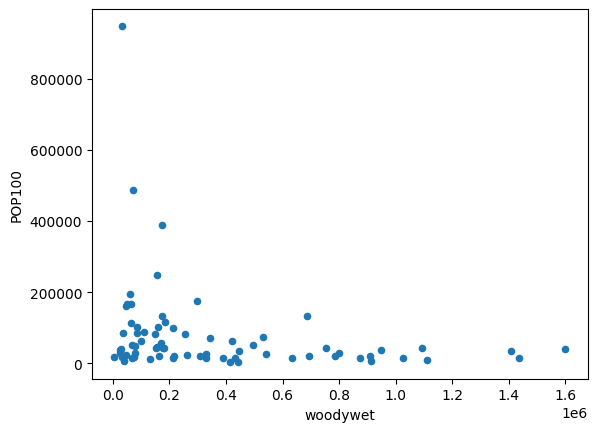

In [22]:
#Q15: What is the Relationship Between POP100 and woody wetlands?

land = rasterio.open("zip://../p6/land.zip!wi.tif")
wwet = []
counties2 = counties.to_crs(land.crs)["geometry"]
counties['geometry'] = counties2

for i in counties['NAME']:
    county = counties.loc[counties['NAME']==i]
    matrix, _ = mask(land, county['geometry'], crop=True)
    matrixB = matrix[0]
    wwet.append(sum(sum((matrixB==land_use['woody_wetlands']))))
    
counties['woodywet'] = wwet
counties.plot.scatter(x = 'woodywet', y = 'POP100')



In [23]:
df = gpd.read_file('tracts.shp')
df['geometry'] = df.to_crs(land.crs)["geometry"]
for key in land_use:
    df[key] = 0

for i in range(len(df['GEOID'])):
    geoid = df.loc[df['GEOID']==df['GEOID'][i]]
    matrix, _ = mask(land, geoid['geometry'], crop=True)
    matrixB = matrix[0]
    for key in land_use:
        df.at[i, key] = sum(sum((matrixB==land_use[key])))



<AxesSubplot:>

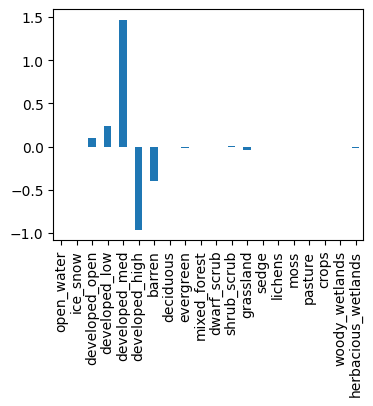

In [24]:
#Q16: What features does your model rely on most?

train, test = train_test_split(df, random_state=320)

xcols = list(land_use.keys())
ycol = "POP100"

model = LinearRegression()
model.fit(train[xcols], train[ycol])
model.score(test[xcols], test[ycol]) 
pd.Series(model.coef_, index=xcols).plot.bar(figsize=(4,3))

#It appears the POP100 is most impacted by developed_med, developed_high, barren, 
#developed_open, and developed_low. Some have a positive relationship with population (developed_med, developed_open, and developed_low)
#and some a negative (developed_high and barren). The other columns don't appear to have an impact on POP100. 

In [25]:
#Q17: How does your recommended model score against the test dataset?

m3 = LinearRegression()
scores3 = cross_val_score(m3, train[["developed_med"]], train["POP100"], cv=10)
scores3.mean()
scores3.std()

m4 = LinearRegression()
scores4 = cross_val_score(m4, train[["developed_high", 'developed_med', 'developed_open']], train["POP100"], cv=10)
scores4.mean()
# scores4.std()

#I recommend m4 because it has the higher explained variance. Also, the std is about the same between m3 and m4, so it makes sense 
#to use the one with higher explained variance. It is also a relatively simple model using the three most impactful predictors seen in Q16.

m4.fit(train[["developed_high", 'developed_med', 'developed_open']], train["POP100"])
m4.score(test[["developed_high", 'developed_med', 'developed_open']], test["POP100"])


0.3877993363871377

In [26]:
con.close()